# Data Analytics: Understanding Customers
## Task 1 - Investigating customer buying patterns
**Author: Magdalena Kobusińska**  

The task was to explore the customer transaction data from the Blackwell Electronics company from recent online and in-store sales, to get an insight about customer purchasing behavior. Questions that should be of particular interest:

- Do customers in different regions spend more per transaction? Which regions spend the most/least?  
- Is there a relationship between number of items purchased and amount spent?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

The data file contains a dataset with customer transactions; it includes some information about the customer who made the transaction, as well as the amount of the transaction, and how many items were purchased.

In-store Column Mapping:  
- 1: in-store purchases  
- 0: online purchases

Region Column Mapping:  
- 1: North  
- 2: South  
- 3: East  
- 4: West

In [2]:
data = pd.read_csv('Demographic_Data.csv')

In [26]:
data.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


### Data cleaning  

In [27]:
duplicated = data[data.duplicated()]
duplicated

,in-store,age,items,amount,region
17858,0,76,6,283.61,2
26112,0,67,4,320.41,2
29343,1,23,2,1019.50,4
33834,1,38,3,1993.80,1
34214,1,31,5,1488.10,4
34706,0,39,5,1268.00,4
35971,0,38,7,391.51,2
43958,1,22,1,1303.20,4
44308,1,26,5,1495.70,4
45164,0,79,6,342.28,2


Besides the fact we have not enough data specification to decide if the same data are the duplicates or just a strange coincidence where the people in the same region, of the same age buys the same amount of items of the same value, I decided to delete them. Therefore, I optained 21 deleted records, what leaves me with 79979 data records.

In [28]:
data = data.drop_duplicates()

In [29]:
# Why it doesn't work for further cells?? 
region_name = {1:"North", 2:"South", 3:"East", 4:"West"}
# data.replace({"region": region_name})
data = data.replace({"region": region_name})

### Basic information describtion

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79979 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  79979 non-null  int64  
 1   age       79979 non-null  int64  
 2   items     79979 non-null  int64  
 3   amount    79979 non-null  float64
 4   region    79979 non-null  object 
dtypes: float64(1), int64(3), object(1)
memory usage: 3.7+ MB


In [31]:
data.describe()

,in-store,age,items,amount
count,79979.000000,79979.000000,79979.000000,79979.000000
mean,0.500006,45.758512,4.505133,835.825727
std,0.500003,15.715158,2.061250,721.263650
min,0.000000,18.000000,1.000000,5.004700
25%,0.000000,33.000000,3.000000,285.120000
50%,1.000000,45.000000,4.000000,582.140000
75%,1.000000,56.000000,6.000000,1233.400000
max,1.000000,85.000000,8.000000,3000.000000


First, I wanted to see the basic information about the data. Worth noting facts:
- mean age of the customer: 46
- number of transactions: 79979
- on average sold 4.5 items per transaction, number of items sold by one transaction: 1-8.
- minimum transaction was on \\$5 and maximum was on \\$3000
- most customers bought things for \\$582

### Amount of transactions in each region

In [32]:
data.groupby('region')['region'].count()

region
East     18000
North    15997
South    19994
West     25988
Name: region, dtype: int64

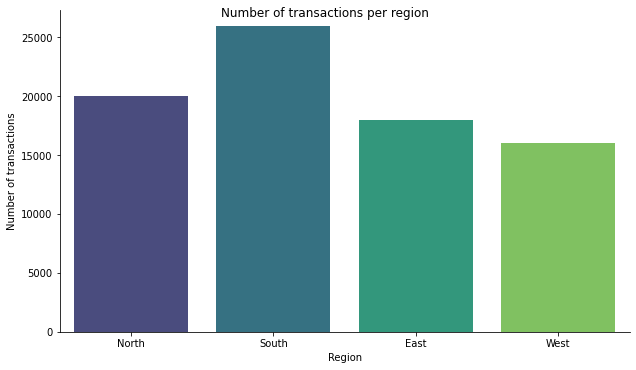

In [33]:
plt_1 = sns.catplot(x='region', data=data, kind='count', aspect=1.75, palette="viridis")
plt_1.set_xlabels('Region')
plt_1.set_ylabels('Number of transactions')
plt_1.fig.suptitle('Number of transactions per region')
plt_1.set_xticklabels(["North", "South", "East", "West"])

It can be seen that the most transactions was done in the West and the least - in the North.

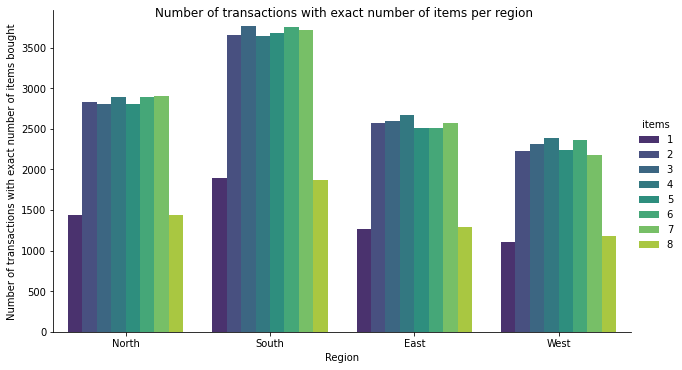

In [34]:
data.groupby(['region', 'items'])['region'].count()
plt_2 = sns.catplot(x='region', data=data, hue='items', kind='count', aspect=1.75, palette="viridis")
plt_2.set_xlabels('Region')
plt_2.set_ylabels('Number of transactions with exact number of items bought')
plt_2.fig.suptitle('Number of transactions with exact number of items per region')
plt_2.set_xticklabels(["North", "South", "East", "West"])

What's interesting, transactions where the customer bought just one or as many as 8 items were rare. It can be seen that on average the customers bought 4 items.

### Amount of money spent by region

In [35]:
pivot_sum_amount_per_region = data.pivot_table('amount','region', aggfunc=np.sum, margins=False)
pivot_sum_amount_per_region.style.format('${0:,.0f}')

,amount
region,
East,"$16,523,453"
North,"$11,917,620"
South,"$5,040,442"
West,"$33,366,990"


Text(0, 0.5, 'Total amount spent by customers')

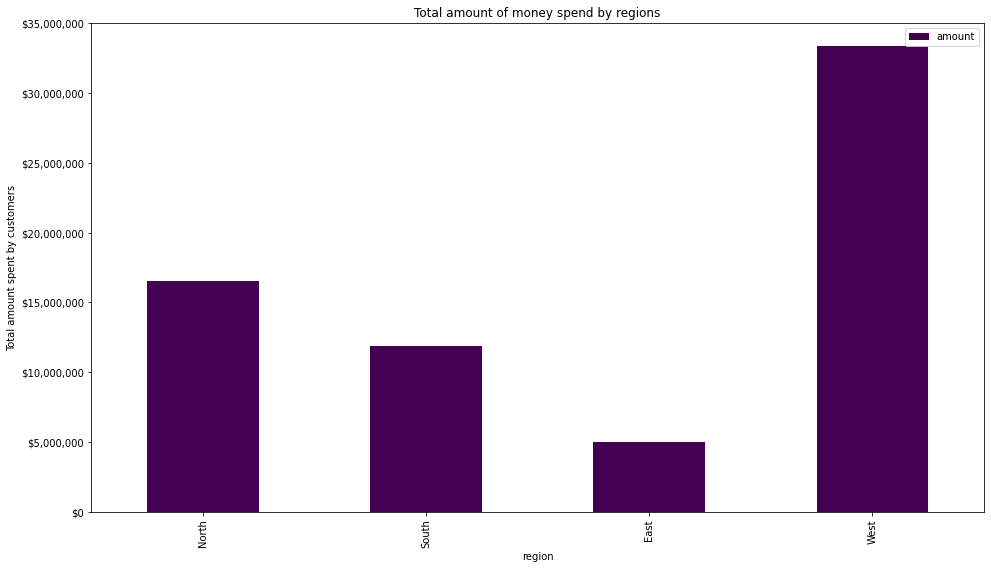

In [36]:
plt3 = pivot_sum_amount_per_region.plot.bar(figsize=(16, 9), title='Total amount of money spend by regions', cmap="viridis").yaxis.set_major_formatter('${x:,.0f}')
plt.gca().set_xticklabels(["North", "South", "East", "West"])
plt.ylabel('Total amount spent by customers')

The comparison between the graph with the number of transaction per region and the one that shows money spent by regions are not consistant. It can be seen that althought (as it could be predictable) on the West the customers both spent the most money and did the greatest amount of transactions, on the South, where the number of transaction was on the second place right after the West, the amount of money spent by customers was the lowest from all the regions. Therefore, to get the better view, I decided to do one more plot.

[Text(0, 0, 'North'),
 Text(1, 0, 'South'),
 Text(2, 0, 'East'),
 Text(3, 0, 'West')]

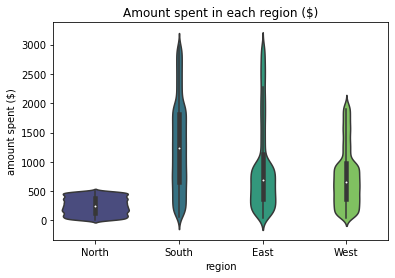

In [37]:
plt_4 = sns.violinplot(x="region", y="amount", data=data, palette="viridis")
plt_4.set(title='Amount spent in each region ($)', xlabel='region', ylabel='amount spent ($)')
plt_4.set_xticklabels(["North", "South", "East", "West"])

By viewing the plot above, it can be seen that in the West, the transactions were the most evenly distributed in terms of the amount of money spent. In the North and in the East the lower value transactions have prevailed, but there have also been some where a larger amount has been spent. In the South lower value transactions have dominated.

In [38]:
# Mean amount spent for exact number of items in certain region
pivot_mean_amount_items_number = data.pivot_table('amount', 'region', 'items', aggfunc=np.mean, margins=False, margins_name = 'All')
pivot_mean_amount_items_number

items,1,2,3,4,5,6,7,8
region,,,,,,,,
East,894.239667,931.767999,916.421853,935.009959,911.578511,903.035816,910.417209,937.914856
North,751.450329,766.924871,743.810869,727.300536,745.737906,740.033224,737.791975,757.540969
South,257.587746,250.012124,252.182018,249.626762,252.399170,254.961019,251.735042,249.882689
West,1255.778428,1297.199268,1272.761661,1280.247027,1277.747343,1296.386021,1280.238420,1310.646915


Text(0, 0.5, 'Amount spent')

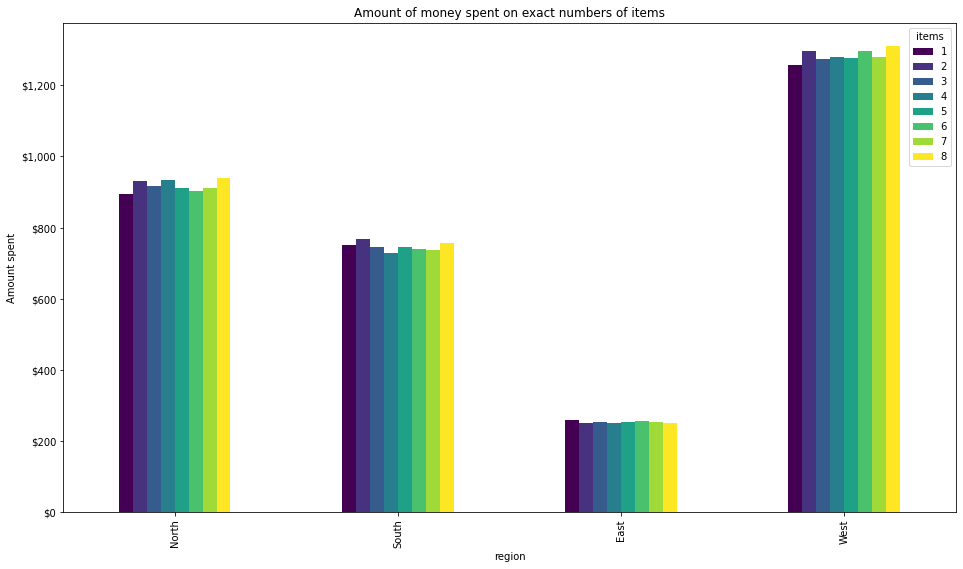

In [39]:
plt_5 = pivot_mean_amount_items_number.plot(kind="bar",figsize=(16, 9), title='Amount of money spent on exact numbers of items', cmap="viridis").yaxis.set_major_formatter('${x:,.0f}')
plt.gca().set_xticklabels(["North", "South", "East", "West"])
plt.ylabel('Amount spent')

What may be considered as something unexpected - the number of items bought did not have any connection with the amount of money spend by the customer.
The most money was spent in the West, ahe least - in the South

### In-store/online by regions

In [40]:
pivot_money = pd.pivot_table(data,index='region',columns='in-store', values='amount',aggfunc='sum', margins = True)
pivot_money.style.format('${0:,.0f}')

in-store,0,1,All
region,,,
East,"$10,793,540","$5,729,913","$16,523,453"
North,$nan,"$11,917,620","$11,917,620"
South,"$5,040,442",$nan,"$5,040,442"
West,"$20,058,007","$13,308,983","$33,366,990"
All,"$35,891,990","$30,956,516","$66,848,506"


[Text(0, 0, 'North'),
 Text(1, 0, 'South'),
 Text(2, 0, 'East'),
 Text(3, 0, 'West')]

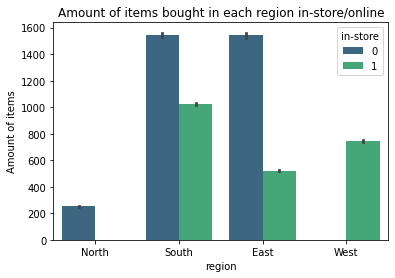

In [41]:
plt_6 = sns.barplot(x="region", y="amount", hue="in-store", data=data, palette="viridis")
plt_6.set(title='Amount of items bought in each region in-store/online', xlabel='region', ylabel='Amount of items')
plt_6.set_xticklabels(["North", "South", "East", "West"])

In the North, there was none transactions done online, which may indicate that the stores there are very well equipped and with nice service - the customers prefere to go and see the desired items and ask about the specifation before buying them. On the contrary, in the South, there was no transactions done in-store, what indicated that the region has none or vary few retail shops in the area. Both in the East and in the West online transactions were the dominant ones.

### Age vs region

c:\users\magda\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:132: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self.fig.legend(handles, labels, **kwargs)


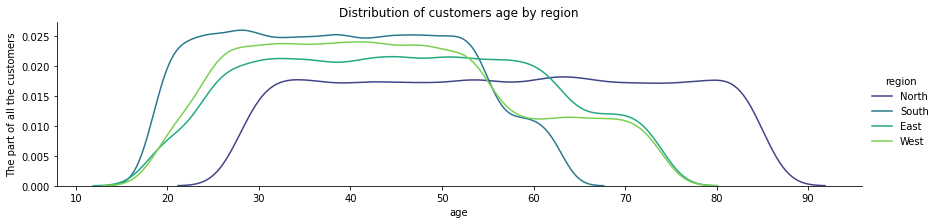

In [42]:
plt_7 = sns.FacetGrid(data, hue='region', aspect=4, palette="viridis")
plt_7.map(sns.kdeplot, 'age')
oldest = data['age'].max()
plt_7.set(title='Distribution of customers age by region', ylabel = 'The part of all the customers')
plt_7.add_legend(labels=["North", "South", "East", "West"])

It can be seen that most elder people bought any items in the South, the youngest people were usually from the West.

### Age vs. in-store

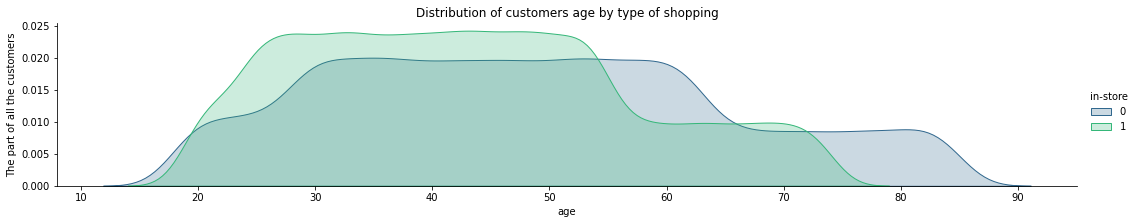

In [43]:
plt_8 = sns.FacetGrid(data, hue='in-store', aspect=5, palette="viridis")
plt_8.map(sns.kdeplot, 'age', shade=True)
oldest = data['age'].max()
plt_8.set(title='Distribution of customers age by type of shopping', ylabel = 'The part of all the customers')
plt_8.add_legend()

It can be seen that the younger people decided to make more transactions in-store, whereas the elder ones prefered online option. It may be connected with the the possible lack of the on-site shops in the South, as what's where the most elder customers come from.

In [44]:
data['age_sections'] = pd.cut(data['age'], bins=[0,21,35,55,75,100], labels=['under 21','age 21-35','age 36-55','age 56-75','over 75'])
data.head()

,in-store,age,items,amount,region,age_sections
0,0,37,4,281.03,South,age 36-55
1,0,35,2,219.51,South,age 21-35
2,1,45,3,1525.70,West,age 36-55
3,1,46,3,715.25,East,age 36-55
4,1,33,4,1937.50,North,age 21-35


In [45]:
pivot_age_groups = pd.pivot_table(data,index='age_sections',columns='in-store',values='amount',aggfunc='sum',fill_value=0, margins=False)
pivot_age_groups.style.format('${0:,.0f}')

in-store,0,1
age_sections,,
under 21,"$2,364,162","$1,414,612"
age 21-35,"$10,374,726","$10,382,436"
age 36-55,"$15,379,563","$15,368,849"
age 56-75,"$6,911,880","$3,790,619"
over 75,"$861,658",$0


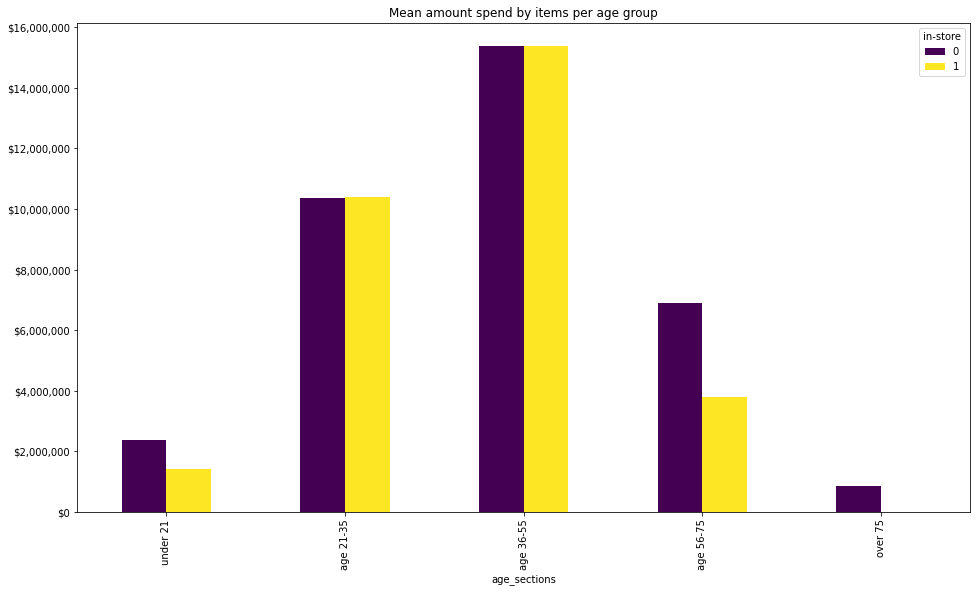

In [46]:
pivot_age_groups.plot.bar(figsize=(16, 9), title='Mean amount spend by items per age group', cmap="viridis").yaxis.set_major_formatter('${x:,.0f}')

At the end, I decided to see the relation between the age of the customers and the amount of money spend. The most frequent customens were in the age range between 36-55 years old and they also spent the most.

### Conclusions

- The most transactions was done in the West and the least - in the North.
- On average the customers bought 4 items, transactions with 1 or 8 items were rare.
- The number of transaction per region and the one that shows money spent by regions are not consistant.
- **The most money was spent in the West, ahe least - in the South**
- **The transactions were the most evenly distributed in terms of the amount of money spent in the West. In the North and in the East the lower value transactions have prevailed, but there have also been some where a larger amount has been spent. In the South lower value transactions have dominated.**
- **The number of items bought did not have any connection with the amount of money spend by the customer.**
- In the North, there was none transactions done online. On the contrary, in the South, there was no transactions done in-store. Both in the East and in the West online transactions were the dominant ones.
- Most elder people bought any items in the South, the youngest people were usually from the West.
- Younger people decided to make more transactions in-store, whereas the elder ones prefered online option.
- The most frequent customens were in the age range between 36-55 years old and they also spent the most.